# K Means Clustering with Python

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Create some Data

In [2]:
dataset= pd.read_csv('D:/iAnalyst/Machine Learning/Cluster Analysis/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data=dataset[['CreditScore','Age','Balance','EstimatedSalary','Exited']]
X=dataset[['CreditScore','Age','Balance','EstimatedSalary']]
y = dataset.Exited

## Creating the Clusters

In [4]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.cluster import KMeans

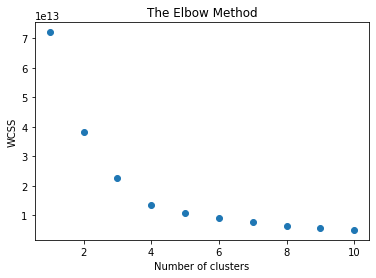

In [6]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    #Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).
plt.scatter(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
X.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


In [8]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
print(y_kmeans[0:10])

[1 2 2 0 3 2 0 2 3 3]


In [10]:
X.iloc[y_kmeans ==2]

,CreditScore,Age,Balance,EstimatedSalary
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
5,645,44,113755.78,149756.71
7,376,29,115046.74,119346.88
26,756,36,136815.64,170041.95
...,...,...,...,...
9971,833,34,144751.81,166472.81
9972,758,26,155739.76,171552.02
9975,610,50,113957.01,196526.55
9978,774,40,93017.47,191608.97


In [11]:
X['Clust'] = y_kmeans
X.head()

<ipython-input-11-23a14dd38fd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clust'] = y_kmeans


,CreditScore,Age,Balance,EstimatedSalary,Clust
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,2
2,502,42,159660.80,113931.57,2
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,3


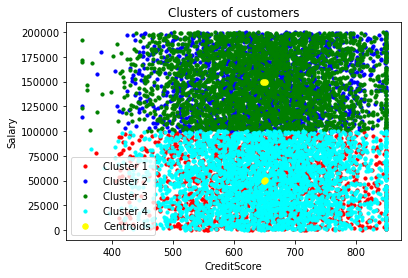

In [12]:
# Visualising the clusters
plt.scatter(X.iloc[y_kmeans == 0]['CreditScore'], X.iloc[y_kmeans == 0]['EstimatedSalary'], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1]['CreditScore'], X.iloc[y_kmeans == 1]['EstimatedSalary'], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2]['CreditScore'], X.iloc[y_kmeans == 2]['EstimatedSalary'], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3]['CreditScore'], X.iloc[y_kmeans == 3]['EstimatedSalary'], s = 10, c = 'cyan', label = 'Cluster 4')
#plt.scatter(XX.iloc[y_kmeans == 4]['CreditScore'], X.iloc[y_kmeans == 4]['Age'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('CreditScore')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [13]:
#kmeans.labels

In [14]:
del X['Clust']
X.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X_scale = sc.fit_transform(X.iloc[0:200,:])

In [17]:
print(X_scale)

[[-1.90056934e-01  4.09846051e-01 -1.18582402e+00  2.95644251e-02]
 [-2.92438240e-01  3.07256301e-01  1.54053030e-01  2.25049731e-01]
 [-1.27902174e+00  4.09846051e-01  1.36675091e+00  2.49306870e-01]
 [ 5.54534384e-01  1.02076801e-01 -1.18582402e+00 -1.01803160e-01]
 [ 1.95995050e+00  5.12435800e-01  8.20778552e-01 -3.59264767e-01]
 [ 5.19352444e-02  6.15025550e-01  6.32845005e-01  8.74952406e-01]
 [ 1.69934353e+00  1.23056405e+00 -1.18582402e+00 -1.56464368e+00]
 [-2.45175306e+00 -9.23820697e-01  6.53484211e-01  3.43879132e-01]
 [-1.28832913e+00  6.15025550e-01  1.08521558e+00 -4.31628053e-01]
 [ 4.14923512e-01 -1.12900020e+00  9.66153728e-01 -4.87770373e-01]
 [-1.03702956e+00 -7.18641198e-01  4.45166939e-01 -3.40106554e-01]
 [-1.32555869e+00 -1.43676945e+00 -1.18582402e+00 -4.06314000e-01]
 [-1.52101391e+00 -4.10871948e-01 -1.18582402e+00 -1.28176079e+00]
 [-8.41574337e-01 -1.33417970e+00 -1.18582402e+00  1.59273627e+00]
 [-4.11386703e-02 -3.08282198e-01 -1.18582402e+00 -5.88608148e

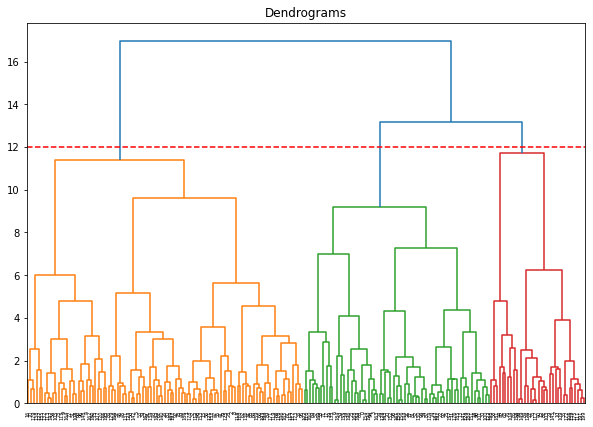

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scale, method='ward'))
plt.axhline(y=12, color='r', linestyle='--')

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X) # try X_scale

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [20]:
X.shape

(10000, 4)

In [21]:
y_agglo = cluster.labels_
print(y_agglo[0:20])

[0 1 1 0 1 2 0 2 1 1 1 0 0 0 0 1 1 0 0 0]


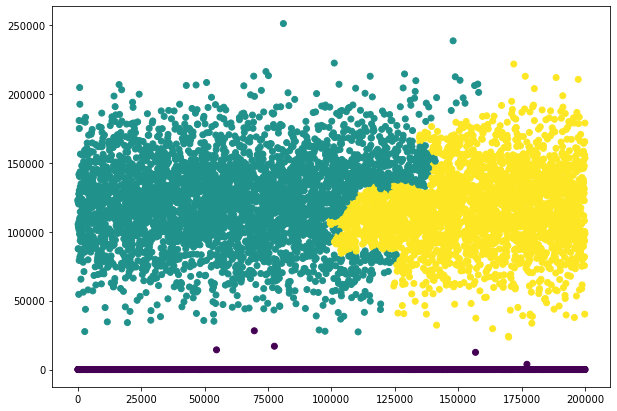

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(X['EstimatedSalary'], X['Balance'], c=cluster.labels_) 

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y, y_kmeans))
print(" ")
print(accuracy_score(y, y_kmeans))

[[1648 1608 2363 2344]
 [ 265  283  761  728]
 [   0    0    0    0]
 [   0    0    0    0]]
 
0.1931
